In [20]:
import sys
sys.path.append("/n/home01/awen/meows_home/LCDM/packages/code/CAMB")

import camb
from camb import model, initialpower
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [8]:
# Define a function to compute the TT power spectrum for a given N_eff value.
def compute_cls_for_neff(Neff_value, lmax=2500):
    # Set up the CAMB parameters
    pars = camb.CAMBparams()
    # Set the cosmological parameters (modify these as needed)
    pars.set_cosmology(H0=67.0, ombh2=0.022, omch2=0.12, mnu=0.06, omk=0, tau=0.06, nnu=Neff_value)
    # Specify the primordial power spectrum parameters
    pars.InitPower.set_params(ns=0.965, r=0)
    # Set the maximum multipole value, and lensing accuracy if needed
    pars.set_for_lmax(lmax=lmax, lens_potential_accuracy=3)
    
    # Get the results from CAMB
    results = camb.get_results(pars)
    # Get the CMB power spectra (here we use 'total', which adds all contributions together)
    powers = results.get_cmb_power_spectra(pars)
    totCL = powers['total']  # This contains the TT, TE, EE, and BB spectra in its columns
    
    # The ell range is determined by the shape of the output
    ells = np.arange(totCL.shape[0])
    return ells, totCL[:, 0]  # Return multipole values and the temperature power (TT)


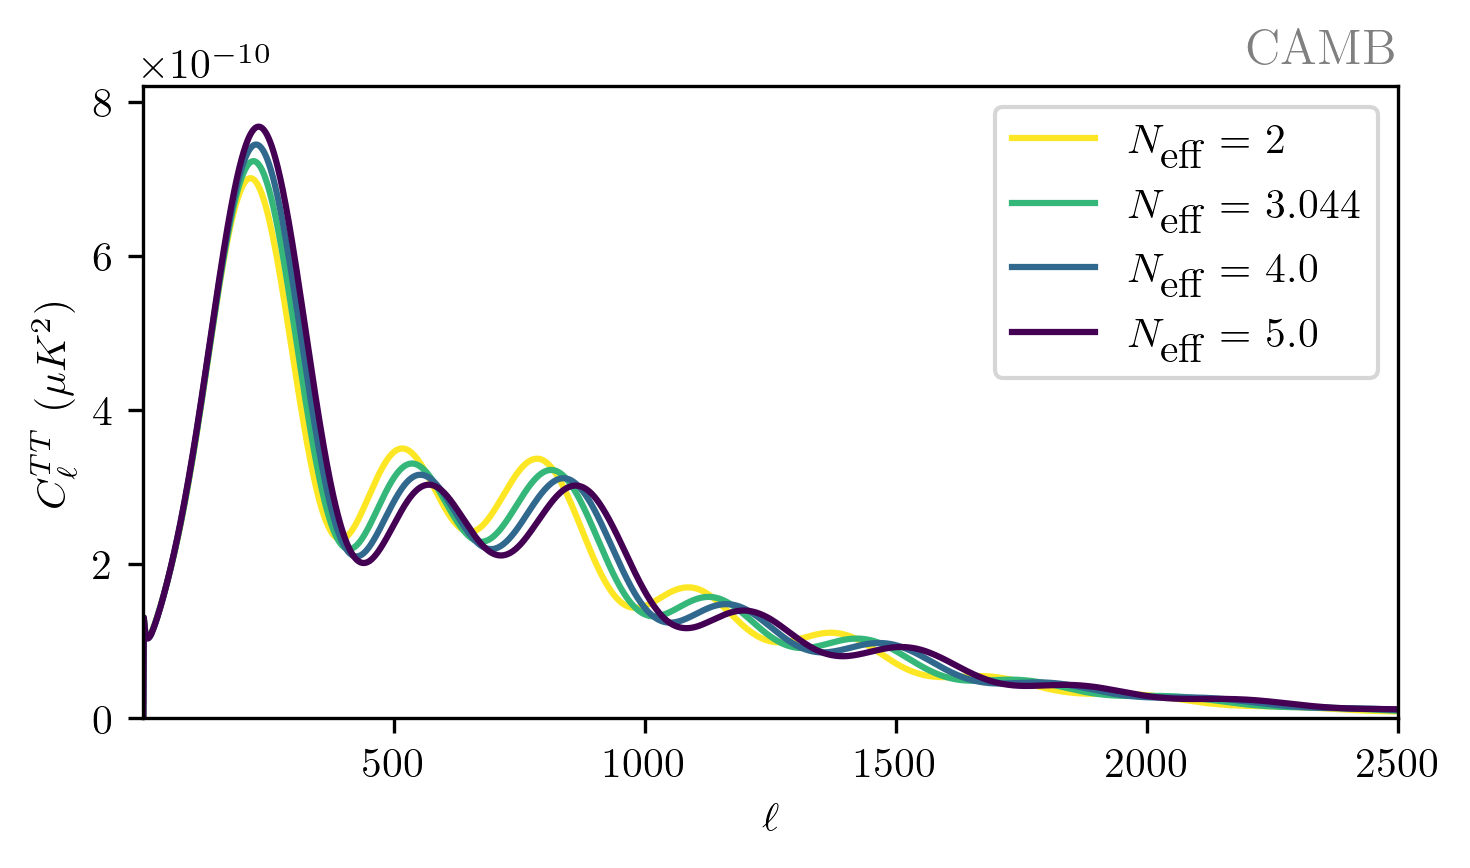

In [ ]:
# Define the range of N_eff values you want to test.
Neff_values = [2, 3.044, 4.0, 5.0]

colors = plt.cm.viridis(np.linspace(1.0, 0.0, len(Neff_values)))

plt.figure(figsize=(5, 3), dpi=300)
for i, Neff in enumerate(Neff_values):
    ells, cl_tt = compute_cls_for_neff(Neff)
    plt.plot(ells, cl_tt, label=rf'$N_\textrm{{eff}}$ = {Neff}', color=colors[i])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{TT}\ (\mu K^2)$')
plt.xlim(1, 2500)
plt.ylim(0,8.2e-10)
plt.legend()

# Add "CAMB" in grey letters in the upper right (using axis coordinates)
# (x=1.0 corresponds to the right edge, y=1.05 is slightly above the plot's top border)
plt.gca().text(1.0, 1.02, 'CAMB',
               transform=plt.gca().transAxes,
               ha='right', va='bottom', color='grey', fontsize=12)

plt.tight_layout()
plt.show()
#plt.savefig('N_eff_variation.pdf', bbox_inches='tight')

/tmp/ipykernel_3703891/3843340463.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(ells, cl_tt/cl_tt_nominal, label=rf'$N_\textrm{{eff}}$ = {Neff}', color=colors[i])


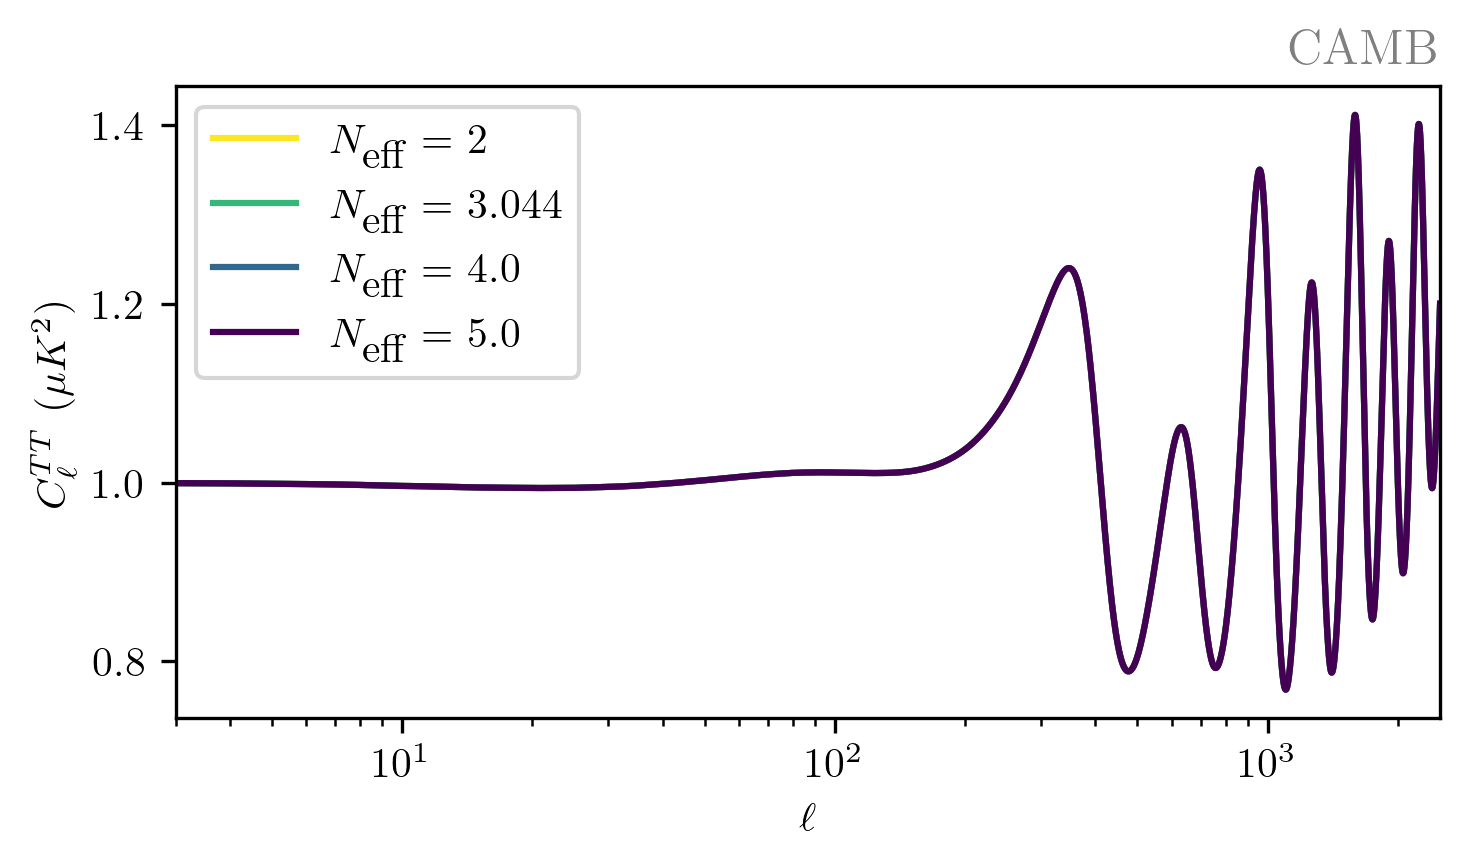

In [34]:
# Define the range of N_eff values you want to test.
Neff_values = [2, 3.044, 4.0, 5.0]

colors = plt.cm.viridis(np.linspace(1.0, 0.0, len(Neff_values)))

ells, cl_tt_nominal = compute_cls_for_neff(3.044)

plt.figure(figsize=(5, 3), dpi=300)
for i, Neff in enumerate(Neff_values):
    #ells, cl_tt = compute_cls_for_neff(Neff)
    plt.plot(ells, cl_tt/cl_tt_nominal, label=rf'$N_\textrm{{eff}}$ = {Neff}', color=colors[i])

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{TT}\ (\mu K^2)$')
plt.xlim(3, 2500)
plt.legend()
plt.xscale('log')

# Add "CAMB" in grey letters in the upper right (using axis coordinates)
# (x=1.0 corresponds to the right edge, y=1.05 is slightly above the plot's top border)
plt.gca().text(1.0, 1.02, 'CAMB',
               transform=plt.gca().transAxes,
               ha='right', va='bottom', color='grey', fontsize=12)

plt.tight_layout()
plt.show()
#plt.savefig('N_eff_variation.pdf', bbox_inches='tight')